# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Inteligência Artificial Aplicada a Finanças</font>

## <font color='blue'>Projeto 2 - Parte 1</font>
### <font color='blue'>Forecast do Valor de Títulos de Renda Fixa ao Longo do Tempo</font>

![title](imagens/P2.png)

O Projeto está dividido em 4 partes e vamos estudar em detalhes o processo de Forecast (previsões) de títulos de Renda Fixa ao longo do tempo.

Leia os manuais em pdf disponibilizados ao longo do capítulo.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
from matplotlib.pyplot import figure

# Imports para métricas e performance do modelo
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Filtrando FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [4]:
# Formatando as saídas dos gráficos
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 12
m.rcParams['xtick.labelsize'] = 10
m.rcParams['ytick.labelsize'] = 10
m.rcParams['text.color'] = 'k'

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy     : 1.21.5
matplotlib: 3.5.1
sklearn   : 1.0.2
pandas    : 1.4.2



## Carregando e Compreendendo os Dados

In [6]:
# Carrega os dados
dados_treino = pd.read_csv("dados/dataset_treino.csv")
dados_teste = pd.read_csv("dados/dataset_teste.csv")

#### Dados de Treino

In [7]:
# Shape
dados_treino.shape

(18288, 3)

In [8]:
# Primeiros registros
dados_treino.head()

,id,data,valor_titulo
0,0,25-08-2020 00:00,8
1,1,25-08-2020 01:00,2
2,2,25-08-2020 02:00,6
3,3,25-08-2020 03:00,2
4,4,25-08-2020 04:00,2


In [9]:
# Últimos registros
dados_treino.tail()

,id,data,valor_titulo
18283,18283,25-09-2022 19:00,868
18284,18284,25-09-2022 20:00,732
18285,18285,25-09-2022 21:00,702
18286,18286,25-09-2022 22:00,580
18287,18287,25-09-2022 23:00,534


In [10]:
# Tipos de dados
dados_treino.dtypes

id               int64
data            object
valor_titulo     int64
dtype: object

#### Dados de Teste

In [11]:
# Shape
dados_teste.shape

(5112, 2)

In [12]:
# Primeiros registros
dados_teste.head()

,id,data
0,18288,26-09-2022 00:00
1,18289,26-09-2022 01:00
2,18290,26-09-2022 02:00
3,18291,26-09-2022 03:00
4,18292,26-09-2022 04:00


In [13]:
# Últimos registros
dados_teste.dtypes

id       int64
data    object
dtype: object

Leia os manuais em pdf no Capítulo 3 com a definição de título de Renda Fixa.

## Exploração e Visualização do Comportamento dos Dados ao Longo do Tempo

Vamos fazer algumas transformações nos dados para poder criar alguns gráficos e verificar se temos algum padrão disponível.

In [14]:
# Converte a coluna de data para o tipo correto
dados_treino['data'] = pd.to_datetime(dados_treino.data, format = '%d-%m-%Y %H:%M')

In [15]:
# Verifica os tipos de dados
dados_treino.dtypes

id                       int64
data            datetime64[ns]
valor_titulo             int64
dtype: object

In [16]:
# Converte a coluna de data para o tipo correto
dados_teste['data'] = pd.to_datetime(dados_teste.data, format = '%d-%m-%Y %H:%M')

In [17]:
# Verifica os tipos de dados
dados_teste.dtypes

id               int64
data    datetime64[ns]
dtype: object

In [18]:
# Vamos extrair os detalhes da coluna de data: ano, mês, dia e hora
for i in (dados_treino, dados_teste):
    i['ano'] = i.data.dt.year
    i['mes'] = i.data.dt.month
    i['dia'] = i.data.dt.day
    i['hora'] = i.data.dt.hour

In [19]:
# Precisamos do dia da semana também
dados_treino['dia_semana'] = dados_treino['data'].dt.dayofweek

In [20]:
# Vejamos como ficou o dataset
dados_treino.head(10)

,id,data,valor_titulo,ano,mes,dia,hora,dia_semana
0,0,2020-08-25 00:00:00,8,2020,8,25,0,1
1,1,2020-08-25 01:00:00,2,2020,8,25,1,1
2,2,2020-08-25 02:00:00,6,2020,8,25,2,1
3,3,2020-08-25 03:00:00,2,2020,8,25,3,1
4,4,2020-08-25 04:00:00,2,2020,8,25,4,1
5,5,2020-08-25 05:00:00,2,2020,8,25,5,1
6,6,2020-08-25 06:00:00,2,2020,8,25,6,1
7,7,2020-08-25 07:00:00,2,2020,8,25,7,1
8,8,2020-08-25 08:00:00,6,2020,8,25,8,1
9,9,2020-08-25 09:00:00,2,2020,8,25,9,1


In [21]:
# Refinamos os dados para o gráfico

# Definimos o índice do dataset
dados_treino.index = dados_treino['data']

# Removemos a coluna ID, pois ela não é relevante neste caso
features = dados_treino.drop('id', axis = 1)

# A variável Count é nossa variável target (total de pessoas que usaram transporte)
target = dados_treino['valor_titulo']

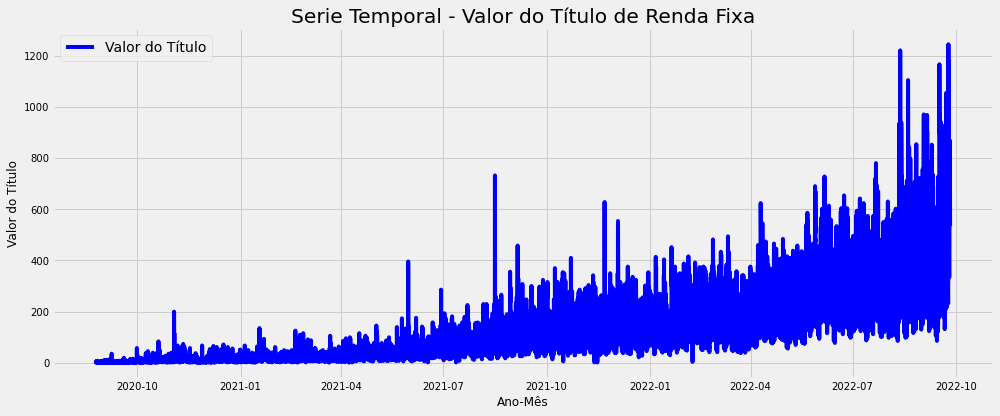

In [22]:
# Plot
figure(figsize = (15, 6))
plt.title("Serie Temporal - Valor do Título de Renda Fixa")
plt.plot(target, label = "Valor do Título", color = 'blue')
plt.xlabel("Ano-Mês")
plt.ylabel("Valor do Título")
plt.legend(loc = "best")

Percebemos que há claramente uma tendência de aumento no valor do título ao longo do tempo. Vamos extrair mais detalhes com outros graficos.

Observe que calcularemos as médias abaixo sem considerar ordem cronológica. Cada elemento de data é tratado como uma categoria.

<AxesSubplot:xlabel='ano'>

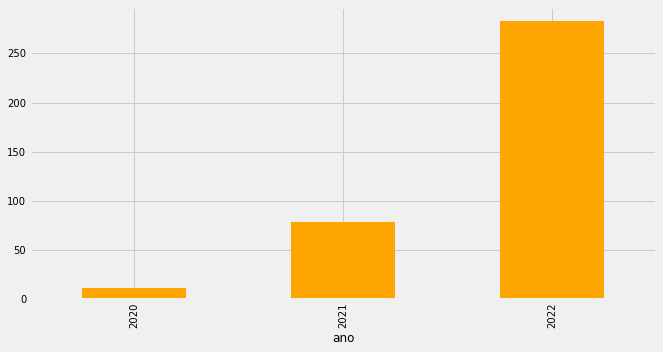

In [23]:
# Vamos criar um gráfico de barras com a média do valor do título por ano
figure(figsize = (10, 5))
dados_treino.groupby('ano')['valor_titulo'].mean().plot.bar(color = 'orange')

<AxesSubplot:xlabel='mes'>

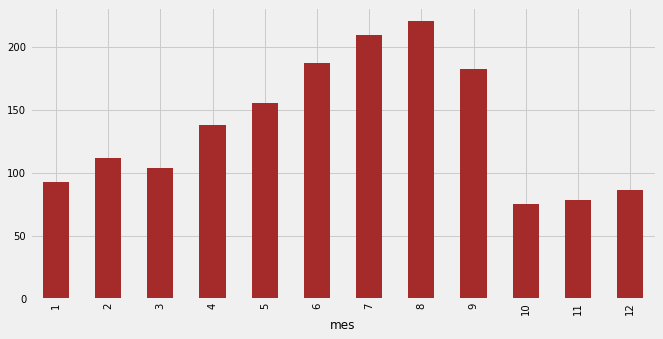

In [24]:
# Vamos criar um gráfico de barras com a média do valor do título por mês (independente do ano)
figure(figsize = (10, 5))
dados_treino.groupby('mes')['valor_titulo'].mean().plot.bar(color = 'brown')

<AxesSubplot:title={'center':'Média do Valor do Título Por Mês a Cada Ano'}, xlabel='ano,mes'>

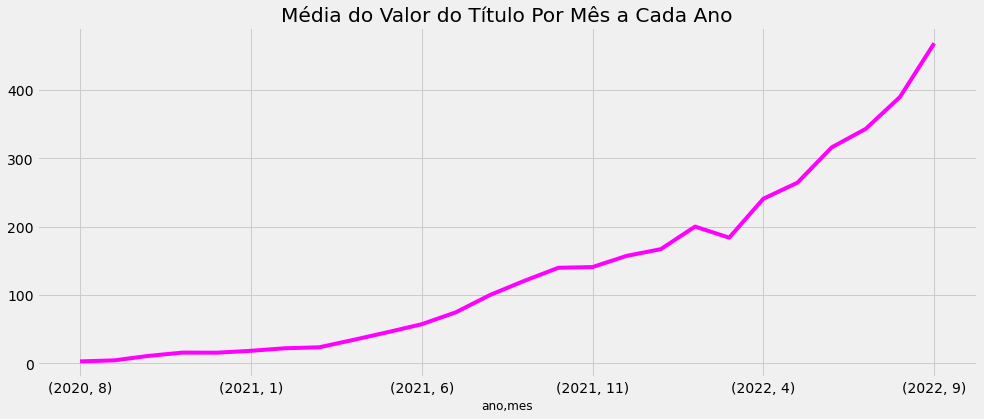

In [25]:
# Vamos calcular a média mensal por ano_mês
figure(figsize = (15, 6))
media_mensal = dados_treino.groupby(['ano', 'mes'])['valor_titulo'].mean()
media_mensal.plot(title = "Média do Valor do Título Por Mês a Cada Ano", fontsize = 14, color = 'magenta')

<AxesSubplot:xlabel='dia'>

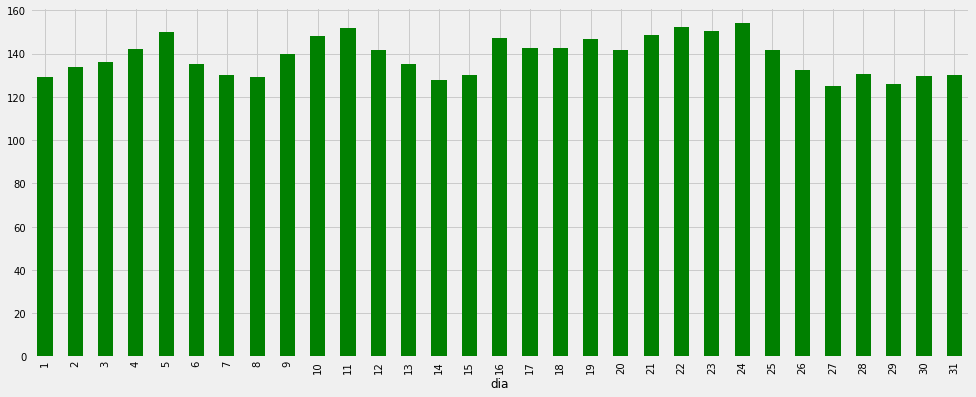

In [26]:
# E qual será a média diária por dia do mês? Vamos checar
figure(figsize = (15, 6))
dados_treino.groupby('dia')['valor_titulo'].mean().plot.bar(color = 'green')

<AxesSubplot:xlabel='hora'>

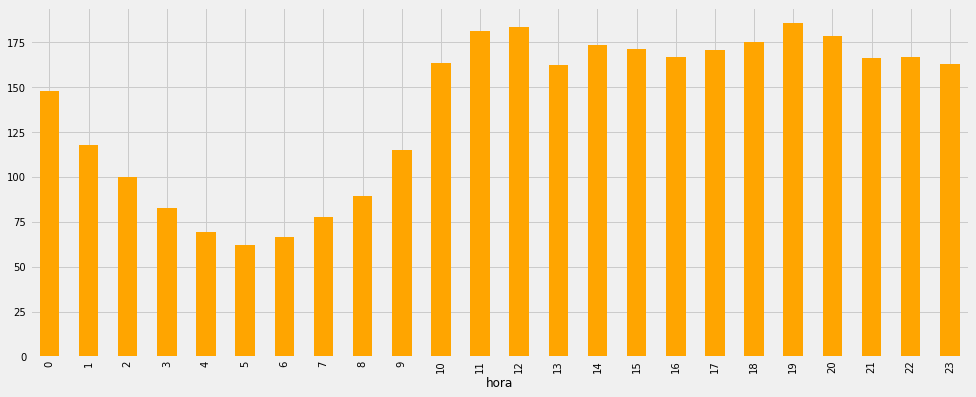

In [27]:
# Vamos descer mais um nível e analisar a média por hora
# Como era de se esperar, na madrugada a média é menor do que em outras horas do dia
figure(figsize = (15, 6))
dados_treino.groupby('hora')['valor_titulo'].mean().plot.bar(color = 'orange')

Vamos criar um gráfico com 4 séries representando a média por mês, por semana, por dia e por hora para confirmar a tendência de crescimento. 

Observe que agora calcularemos as médias abaixo considerando a ordem cronológica dos dados.

In [28]:
dados_treino.tail()

,id,data,valor_titulo,ano,mes,dia,hora,dia_semana
data,,,,,,,,
2022-09-25 19:00:00,18283,2022-09-25 19:00:00,868,2022,9,25,19,6
2022-09-25 20:00:00,18284,2022-09-25 20:00:00,732,2022,9,25,20,6
2022-09-25 21:00:00,18285,2022-09-25 21:00:00,702,2022,9,25,21,6
2022-09-25 22:00:00,18286,2022-09-25 22:00:00,580,2022,9,25,22,6
2022-09-25 23:00:00,18287,2022-09-25 23:00:00,534,2022,9,25,23,6


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

In [29]:
# Média por mês
serie_media_mes = dados_treino.resample('M').mean()

In [30]:
# Média por semana
serie_media_semana = dados_treino.resample('W').mean()

In [31]:
# Média por dia
serie_media_dia = dados_treino.resample('D').mean() 

In [32]:
# Média por hora
serie_media_hora = dados_treino.resample('H').mean() 

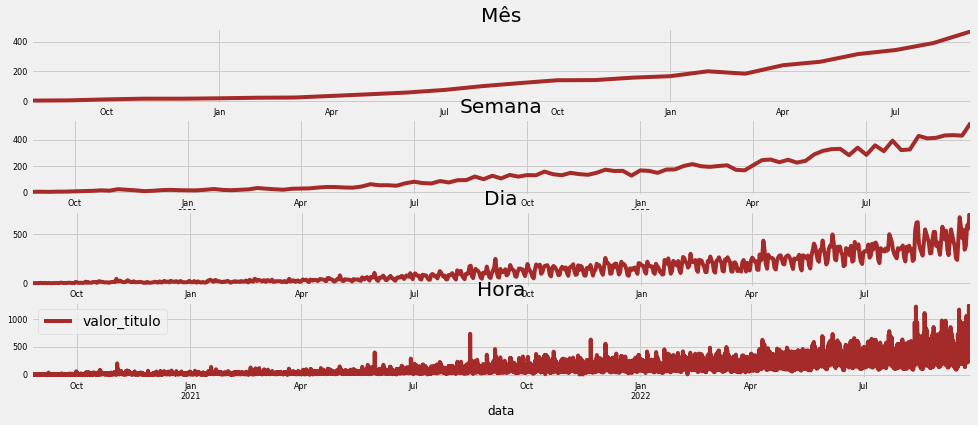

In [33]:
# Plot
fig, axs = plt.subplots(4,1) 
serie_media_mes.valor_titulo.plot(title = 'Mês', fontsize = 8, ax = axs[0], color = 'brown', figsize = (15, 6)) 
serie_media_semana.valor_titulo.plot(title = 'Semana', fontsize = 8, ax = axs[1], color = 'brown', figsize = (15, 6)) 
serie_media_dia.valor_titulo.plot(title = 'Dia', fontsize = 8, ax = axs[2], color = 'brown', figsize = (15, 6)) 
serie_media_hora.valor_titulo.plot(title = 'Hora', fontsize = 8, ax = axs[3], color = 'brown', figsize = (15, 6)) 
plt.legend(loc = "best")
plt.show()

## Pré-Processamento dos Dados

Já coletamos bastante informação sobre nossos dados. Essa compreensão ajuda a entender se nosso modelo preditivo será eficiente. 

Vamos agora dividir os dados de treino em duas amostras, treino e validação. Usamos os dados de treino para treinar o modelo e os dados de validação para validar a performance do modelo antes de usar dados de teste.

Observe que os registros são separados em ordem cronológica, diferentemente o que fazemos com modelos de Machine Learning que não consideram a data como indexador. Para esses modelos queremos a divisão dos dados de forma aleatória. Em séries temporais, queremos a divisão em ordem cronológica, já que o tempo é um elemento de informação dos dados.

Não precisamos checar a estacionaridade da série, pois o primeiro método de Forecasting usado não faz suposições sobre a série temporal.

In [34]:
# Os dados de treino serão divididos em dados de treino e validação
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

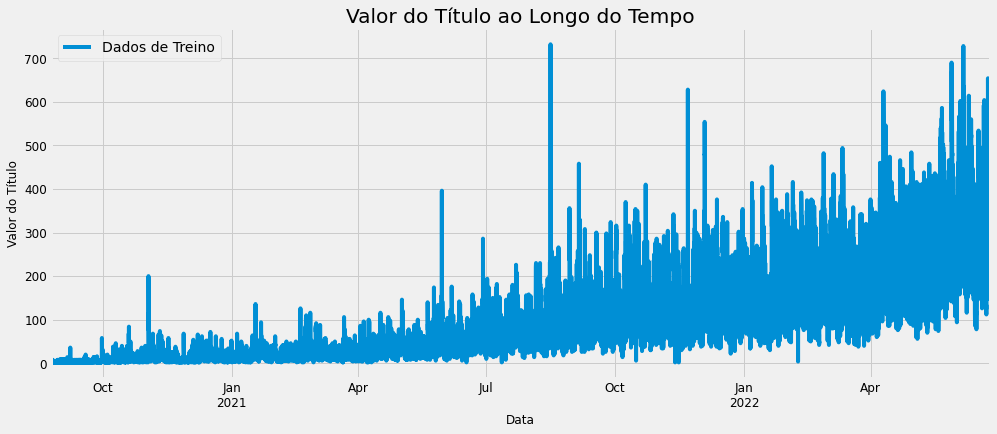

In [35]:
# Plot
figure(figsize = (15, 6))
df_treino.valor_titulo.plot(title = 'Valor do Título ao Longo do Tempo', fontsize = 12, label = 'Dados de Treino') 
plt.xlabel("Data") 
plt.ylabel("Valor do Título") 
plt.legend(loc = 'best') 
plt.show()

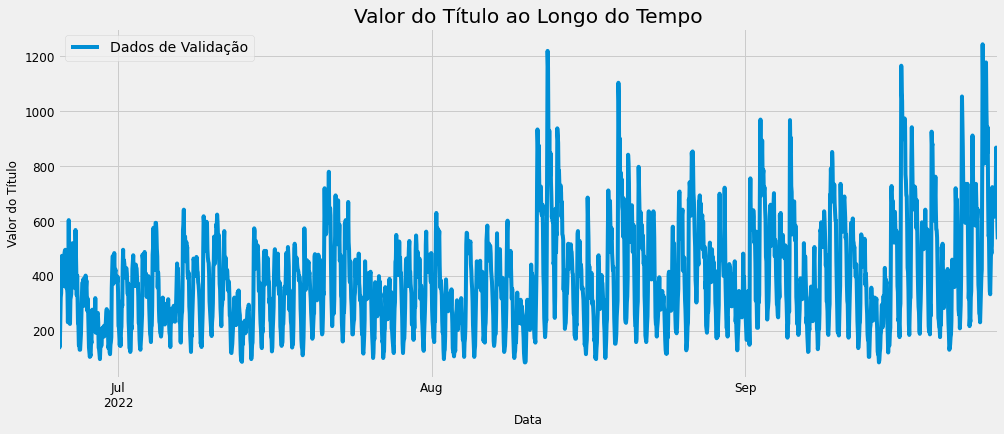

In [36]:
# Plot
figure(figsize = (15, 6))
df_valid.valor_titulo.plot(title = 'Valor do Título ao Longo do Tempo', fontsize = 12, label = 'Dados de Validação') 
plt.xlabel("Data") 
plt.ylabel("Valor do Título") 
plt.legend(loc = 'best') 
plt.show()

## Forecasting - Modelagem Preditiva Para Séries Temporais

Criaremos vários modelos para este problema que temos em mãos, aumentando o grau de complexidade a cada versão.

Mas toda caminhada deve começar com o primeiro passo. Vamos começar com o modelo preditivo mais simples que podemos criar.

### Implementando a Estratégia 1 de Forecasting - Método Naive

Técnica de estimativa na qual os dados reais do último período são usados como previsão desse período, sem ajustá-los ou tentar estabelecer fatores causais. É usado apenas para comparação com as previsões geradas pelas melhores técnicas (sofisticadas).

Naive = ingênuo

Não há técnica avançada aqui e apenas usamos como ponto de partida. Qualquer modelo mais avançado deve apresentar resultados superiores ao Método Naive.

In [37]:
type(df_treino)

pandas.core.frame.DataFrame

In [38]:
# Criamos um array com os valores da variável target em treino
array_valor_titulo_treino = np.asarray(df_treino.valor_titulo)

In [39]:
type(array_valor_titulo_treino)

numpy.ndarray

In [40]:
array_valor_titulo_treino

array([  8,   2,   6, ..., 352, 390, 332])

In [41]:
# Cria uma cópia dos dados de validação para usar na comparação dos dados reais com as previsões
df_valid_cp = df_valid.copy()

Veja como o método é mesmo Naive

Os dados reais (de treino) são usados como previsão para os dados de validação, sem ajustá-los ou tentar estabelecer fatores causais.

In [42]:
len(array_valor_titulo_treino)

16057

In [43]:
# Previsão. Sim, isso é o Método Naive!
df_valid_cp['previsao_naive'] = array_valor_titulo_treino[len(array_valor_titulo_treino) - 1] 

In [44]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid_cp[['valor_titulo', 'previsao_naive']].head()

,valor_titulo,previsao_naive
data,,
2022-06-25 02:00:00,218,332
2022-06-25 03:00:00,244,332
2022-06-25 04:00:00,168,332
2022-06-25 05:00:00,140,332
2022-06-25 06:00:00,156,332


In [45]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid_cp[['valor_titulo', 'previsao_naive']].tail()

,valor_titulo,previsao_naive
data,,
2022-09-25 19:00:00,868,332
2022-09-25 20:00:00,732,332
2022-09-25 21:00:00,702,332
2022-09-25 22:00:00,580,332
2022-09-25 23:00:00,534,332


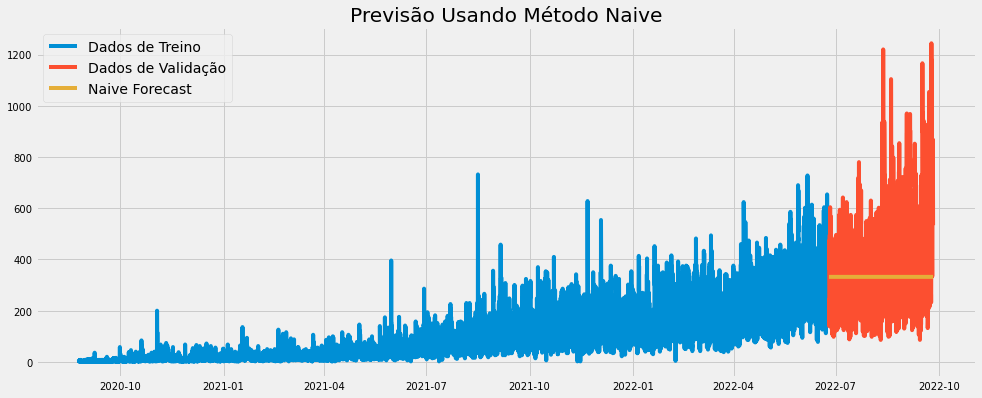

In [46]:
# Plot
figure(figsize = (15, 6))
plt.title("Previsão Usando Método Naive") 
plt.plot(df_treino.index, df_treino['valor_titulo'], label = 'Dados de Treino') 
plt.plot(df_valid.index, df_valid['valor_titulo'], label = 'Dados de Validação') 
plt.plot(df_valid_cp.index, df_valid_cp['previsao_naive'], label = 'Naive Forecast') 
plt.legend(loc = 'best') 
plt.show()

Observe que a linha amarela segue uma linha horizontal, sem considerar o padrão de comportamento da série ao longo do tempo. 

Ou seja, a previsão seria apenas um valor geral considerando o último valor dos dados de treino (dados históricos).

Como sabemos, o valor do título vai sofrer oscilações e é exatamente isso que desejamos prever, para então vender na alta e comprar na baixa, conseguindo algum lucro.

Esse é um método muito simples, mas que serve como ponto de partida. Qualquer técnica mais avançada deve apresentar uma performance melhor.

Então vamos trabalhar para criar um modelo robusto nas próximas aulas. Mas antes, vamos calcular a taxa de erro do modelo.

In [47]:
# Define valor real e valor previsto
y_true = df_valid_cp.valor_titulo
y_pred = df_valid_cp.previsao_naive

In [48]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

195.06210118417584


RMSE é a taxa de erro e quanto menor, melhor!

# Fim